Project Report Test

This file was used to run the code in colab and was later split into seperate files for assessment

In [1]:
#Part 3 Code
#Import a bunch of things needed to access image files
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import zipfile
import os
from os import walk
import tensorflow as tf
import numpy as np
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/keras_png_slices_data.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()
import glob
something = glob.glob("/tmp/keras_png_slices_data/keras_png_slices_test/*")
something2 = glob.glob("/tmp/keras_png_slices_data/keras_png_slices_train/*")
something3 = glob.glob("/tmp/keras_png_slices_data/keras_png_slices_validate/*")
testArray = []
trainArray = []
validateArray = []


Mounted at /content/drive


In [2]:
def squeeze(array):
      Array = np.asarray(array)
      Array = np.squeeze(Array)
      return Array

In [3]:
def ImageExtract(images):
    Array = []
    for x in images:
        sample_image = tf.io.read_file(str(x))
        sample_image = tf.image.decode_png(sample_image)
        sample_image = tf.image.convert_image_dtype(sample_image, tf.float32)
        sample_image = tf.image.resize(sample_image, [256, 256])
        y = tf.shape(sample_image)[1]
        y = y // 2
        image = sample_image[:, y:, :]
        image = tf.cast(sample_image, tf.float32)
        image = np.squeeze(image)
        Array.append([image])
        Array2 = squeeze(Array)
    return Array2

In [ ]:
test = ImageExtract(something)

In [ ]:
validate = ImageExtract(something3)

In [ ]:
#print(test.shape, train.shape, validate.shape)

(544, 256, 256) (28992,) (1120, 256, 256)


In [4]:
import glob
something = glob.glob("/tmp/keras_png_slices_data/keras_png_slices_test/*")
something2 = glob.glob("/tmp/keras_png_slices_data/keras_png_slices_train/*")
something3 = glob.glob("/tmp/keras_png_slices_data/keras_png_slices_validate/*")
testArray = []
trainArray = []
validateArray = []
#For each file in each folder (seg_test, seg_train and seg_validate, get the image
#resize from 256x256 to 32x32 for memory management purposes
#Store in a np.array for use in models)
for x in something:
  sample_image = tf.io.read_file(str(x))
  sample_image = tf.image.decode_png(sample_image)
  sample_image = tf.image.convert_image_dtype(sample_image, tf.float32)
  sample_image = tf.image.resize(sample_image, [256, 256])
  y = tf.shape(sample_image)[1]
  y = y // 2
  image = sample_image[:, y:, :]
  image = tf.cast(sample_image, tf.float32)
  image = np.squeeze(image)
  testArray.append([image])

for x in something2:
  sample_image = tf.io.read_file(str(x))
  sample_image = tf.io.decode_png(sample_image)
  sample_image = tf.image.convert_image_dtype(sample_image, tf.float32)
  sample_image = tf.image.resize(sample_image, [256, 256])
  y = tf.shape(sample_image)[1]
  y = y // 2
  image = sample_image[:, y:, :]
  image = tf.cast(sample_image, tf.float32)
  image = np.squeeze(image)
  trainArray.append([image])

for x in something3:
  sample_image = tf.io.read_file(str(x))
  sample_image = tf.io.decode_png(sample_image)
  sample_image = tf.image.convert_image_dtype(sample_image, tf.float32)
  sample_image = tf.image.resize(sample_image, [256, 256])
  y = tf.shape(sample_image)[1]
  y = y // 2
  image = sample_image[:, y:, :]
  image = tf.cast(sample_image, tf.float32)
  image = np.squeeze(image)
  validateArray.append([image])

train = np.asarray(trainArray)

test = np.asarray(testArray)

validate = np.asarray(validateArray)
print(test.shape, train.shape, validate.shape)
test = np.squeeze(test)
train = np.squeeze(train)
validate = np.squeeze(validate)
print(test.shape, train.shape, validate.shape)


(544, 1, 256, 256) (9664, 1, 256, 256) (1120, 1, 256, 256)
(544, 256, 256) (9664, 256, 256) (1120, 256, 256)


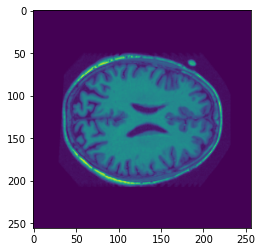

In [5]:
plt.imshow(train[1])

In [12]:
print(train.min(), train.max())
print(test.min(), test.max())
print(test.shape)

0.0 1.0
0.0 1.0
(544, 256, 256)


In [6]:
def combine(train, test):
    """
    Combine the given train and test set together into a single larger test set
    Scale image pixels
    Return combined constructed array
    """
    Oasis = np.concatenate([train, test], axis=0)
    Oasis = np.expand_dims(Oasis, -1).astype("float32")
    return Oasis

In [7]:
Oasis = combine(train, validate)
test = np.squeeze(test)
test = np.expand_dims(test, -1).astype("float32")
validate = np.squeeze(validate)
validate = np.expand_dims(validate, -1).astype("float32")
print(Oasis.shape)
print(Oasis.min(), Oasis.max())

(10784, 256, 256, 1)
0.0 1.0


In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras import layers
def new_encoder(latent_dim):
    """
    Create the Structure for a typical CNN encoder
    """
    encoder_input = keras.Input(shape=(256, 256, 1))
    encoder = (layers.Conv2D(32, 3, activation="relu", strides=2, padding="same"))(encoder_input)
    encoder = (layers.Conv2D(64, 3, activation="relu", strides=2, padding="same"))(encoder)
    #encoder = (layers.Conv2D(128, 3, activation="relu", strides=2, padding="same"))(encoder)
    #encoder = (layers.Conv2D(256, 3, activation="relu", strides=2, padding="same"))(encoder)
    encoder_output = (layers.Conv2D(latent_dim, 1, padding="same"))(encoder)
    return keras.Model(encoder_input, encoder_output, name="encoder")
new_encoder(32).summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        2080      
                                                                 
Total params: 20,896
Trainable params: 20,896
Non-trainable params: 0
_________________________________________________________________


In [9]:
def new_decoder(latent_dim):
    """
    Create the Structure for the decoder based on the inverse of the encoder created above
    """
    latent_inputs = keras.Input(shape=new_encoder(latent_dim).output.shape[1:])
    #decoder = (layers.Conv2DTranspose(256, 3, activation="relu", strides=2, padding="same"))(latent_inputs)
    #decoder = (layers.Conv2DTranspose(128, 3, activation="relu", strides=2, padding="same"))(decoder)
    decoder = (layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same"))(latent_inputs)
    decoder = (layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same"))(decoder)
    decoder_output = (layers.Conv2DTranspose(1, 3,padding="same"))(decoder)
    return keras.Model(latent_inputs, decoder_output, name="decoder")
new_decoder(32).summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 32)]      0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 128, 128, 64)     18496     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 256, 256, 32)     18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 256, 256, 1)      289       
 ranspose)                                                       
                                                                 
Total params: 37,249
Trainable params: 37,249
Non-trainable params: 0
_______________________________________________________

In [10]:
class VectorQuantizer(layers.Layer):
    """
    Create the custom VectorQuantizer class layer, which is inbetween the encoder and decoder
    """
    def __init__(self, num_embeddings, embedding_dim, beta=0.25, **kwargs):
        """
        Initialise the layer

        Parameters:
        num_embeddings: number of embeddings in the codebook
        embedding_dim: The dimensionality of the embedding vector
        beta: Used to calculate loss, initiates between [0.25, 2] per paper
        """
        super().__init__(**kwargs)
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings
        self.beta = beta

        #Initialise embeddings to be quantized
        w_init = tf.random_uniform_initializer()
        self.embeddings = tf.Variable(
            initial_value=w_init(
                shape=(self.embedding_dim, self.num_embeddings), dtype="float32"
            ),
            trainable=True,
            name="embeddings_vqvae",
        )
    
    def call(self, given):
        # Calculate the shape of the given input
        input_shape = tf.shape(given)
        # flatten the given input keeping dimensionality intact.
        flattened = tf.reshape(given, [-1, self.embedding_dim])

        # Quantization.
        encoding_indices = self.get_code_indices(flattened)
        encodings = tf.one_hot(encoding_indices, self.num_embeddings)
        quantized = tf.matmul(encodings, self.embeddings, transpose_b=True)

        # Reshape the quantized values back to the original input shape
        quantized = tf.reshape(quantized, input_shape)

        # Calculate vector quantization loss and add that to the layer. 
        commitment_loss = tf.reduce_mean((tf.stop_gradient(quantized) - given) ** 2)
        codebook_loss = tf.reduce_mean((quantized - tf.stop_gradient(given)) ** 2)
        self.add_loss(self.beta * commitment_loss + codebook_loss)

        # Straight-through estimator.
        quantized = given + tf.stop_gradient(quantized - given)
        return quantized

    def get_code_indices(self, flattened_inputs):
        # Calculate L2-normalized distance between the inputs and the codes.
        similarity = tf.matmul(flattened_inputs, self.embeddings)
        distances = (
            tf.reduce_sum(flattened_inputs ** 2, axis=1, keepdims=True)
            + tf.reduce_sum(self.embeddings ** 2, axis=0)
            - 2 * similarity
        )
        # Derive the indices for minimum distances.
        encoding_indices = tf.argmin(distances, axis=1)
        return encoding_indices


In [11]:
def get_vqvae(latent_dim=32, num_embeddings=128):
    vq_layer = VectorQuantizer(num_embeddings, latent_dim, name="vector_quantizer")
    encoder = new_encoder(latent_dim)
    decoder = new_decoder(latent_dim)
    inputs = keras.Input(shape=(256, 256, 1))
    encoder_outputs = encoder(inputs)
    quantized_latents = vq_layer(encoder_outputs)
    reconstructions = decoder(quantized_latents)
    return keras.Model(inputs, reconstructions, name="vq_vae")

In [12]:
get_vqvae().summary()

Model: "vq_vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 encoder (Functional)        (None, 64, 64, 32)        20896     
                                                                 
 vector_quantizer (VectorQua  (None, 64, 64, 32)       4096      
 ntizer)                                                         
                                                                 
 decoder (Functional)        (None, 256, 256, 1)       37249     
                                                                 
Total params: 62,241
Trainable params: 62,241
Non-trainable params: 0
_________________________________________________________________


In [13]:
class VQVAE(keras.models.Model):
    def __init__(self, train_variance, latent_dim=32, num_embeddings=128, **kwargs):
        super(VQVAE, self).__init__(**kwargs)
        self.train_variance = train_variance
        self.latent_dim = latent_dim
        self.num_embeddings = num_embeddings
        #Create model sequence
        self.vqvae = get_vqvae(self.latent_dim, self.num_embeddings)
        #encoder = new_encoder(latent_dim)
        #decoder = new_decoder()
        #Construct the components for the model
        #self.add(encoder)
        #self.add(self.vqvae)
        #self.add(decoder)
        #Initialise loss components
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.vq_loss_tracker = keras.metrics.Mean(name="vq_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.vq_loss_tracker,
        ]

    def train_step(self, x):
        with tf.GradientTape() as tape:
            # Outputs from the VQ-VAE.
            reconstructions = self.vqvae(x)

            # Calculate the losses.
            reconstruction_loss = (
                tf.reduce_mean((x - reconstructions) ** 2) / self.train_variance
            )
            total_loss = reconstruction_loss + sum(self.vqvae.losses)

        # Backpropagation.
        grads = tape.gradient(total_loss, self.vqvae.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.vqvae.trainable_variables))

        # Loss tracking.
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.vq_loss_tracker.update_state(sum(self.vqvae.losses))

        # Log results.
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "vqvae_loss": self.vq_loss_tracker.result(),
        }


In [14]:
variance = np.var(Oasis)

In [33]:
model = VQVAE(variance, latent_dim=32, num_embeddings=128)
model.compile(optimizer=keras.optimizers.Adam())
history = model.fit(Oasis, epochs=30, batch_size=128)

Epoch 1/30
85/85 [==============================] - 8s 83ms/step - loss: 9.0698 - reconstruction_loss: 0.6655 - vqvae_loss: 8.1094
Epoch 2/30
85/85 [==============================] - 7s 83ms/step - loss: 152.2806 - reconstruction_loss: 0.2143 - vqvae_loss: 152.0313
Epoch 3/30
85/85 [==============================] - 7s 83ms/step - loss: 19.1798 - reconstruction_loss: 0.1963 - vqvae_loss: 19.0110
Epoch 4/30
85/85 [==============================] - 7s 84ms/step - loss: 16.4811 - reconstruction_loss: 0.2136 - vqvae_loss: 16.2169
Epoch 5/30
85/85 [==============================] - 7s 83ms/step - loss: 7.4748 - reconstruction_loss: 0.1595 - vqvae_loss: 7.3012
Epoch 6/30
85/85 [==============================] - 7s 83ms/step - loss: 4.4698 - reconstruction_loss: 0.1658 - vqvae_loss: 4.2842
Epoch 7/30
85/85 [==============================] - 7s 83ms/step - loss: 7.1561 - reconstruction_loss: 0.1276 - vqvae_loss: 7.0087
Epoch 8/30
85/85 [==============================] - 7s 83ms/step - loss: 3.

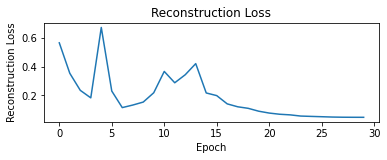

In [16]:
plt.subplot(211)
plt.title('Reconstruction Loss')
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss")
plt.plot(history.history['reconstruction_loss'])

In [17]:
def calculate_ssim(original_images, reconstructed_images):
    """
    Calculate and print the average structured similarity between original and reconstructed images
    """
    similarity = tf.reduce_mean(tf.image.ssim(original_images, reconstructed_images, max_val=1))
    #print("Structured similarity is:", similarity)
    return similarity

In [18]:
print(test.shape)
print(test.min(), test.max())

(544, 256, 256, 1)
0.0 1.0


In [30]:
def average_ssim(sims):
  sum = 0
  for x in sims:
    sum = sum + x
  avg = sum / len(sims)
  return avg

trained_vqvae_model = model.vqvae
idx = np.random.choice(len(test), len(test))
test_images = test[idx]
reconstructions_test = trained_vqvae_model.predict(test_images)
simArray = []
for test_image, recon_img in zip(test_images, reconstructions_test):
    simArray.append(calculate_ssim(test_image, recon_img))
print(average_ssim(simArray))  

17/17 [==============================] - 0s 10ms/step
tf.Tensor(0.7481412, shape=(), dtype=float32)


In [31]:
simArray = np.asarray(simArray)
print(len(simArray))
num = 0
for x in simArray:
  if x >= 0.6:
    num = num + 1

print(num)
print(simArray.max(), simArray.min())

544
544
0.79874754 0.66666377


[517  24  51 486  75 195  31 220 358 304 243  81 298 183 259]
1/1 [==============================] - 0s 21ms/step


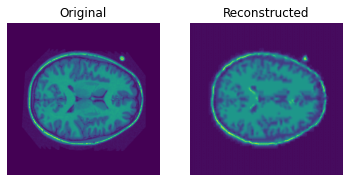

tf.Tensor(0.7583773, shape=(), dtype=float32)


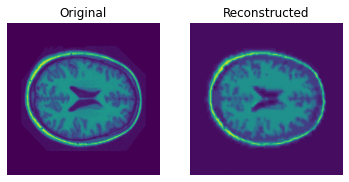

tf.Tensor(0.77314526, shape=(), dtype=float32)


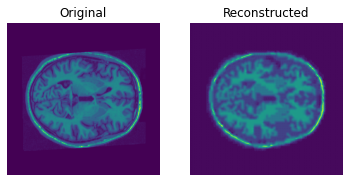

tf.Tensor(0.7406297, shape=(), dtype=float32)


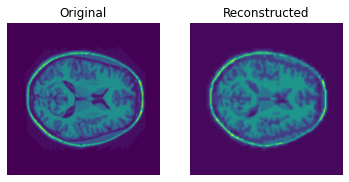

tf.Tensor(0.7747908, shape=(), dtype=float32)


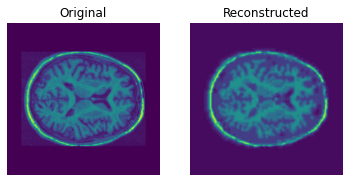

tf.Tensor(0.73816186, shape=(), dtype=float32)


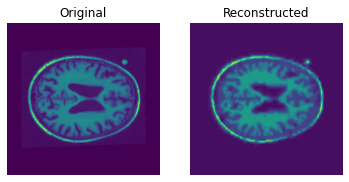

tf.Tensor(0.73172206, shape=(), dtype=float32)


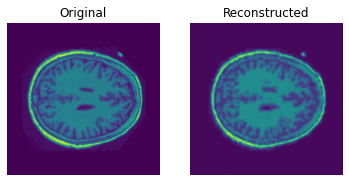

tf.Tensor(0.7857571, shape=(), dtype=float32)


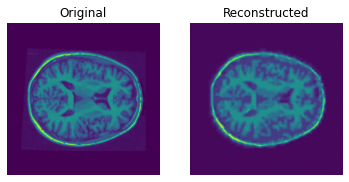

tf.Tensor(0.7363972, shape=(), dtype=float32)


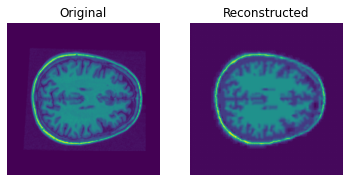

tf.Tensor(0.7446822, shape=(), dtype=float32)


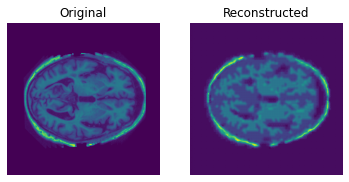

tf.Tensor(0.7577242, shape=(), dtype=float32)


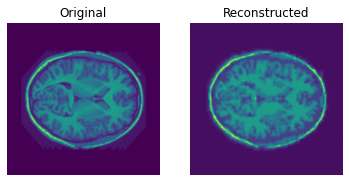

tf.Tensor(0.7564917, shape=(), dtype=float32)


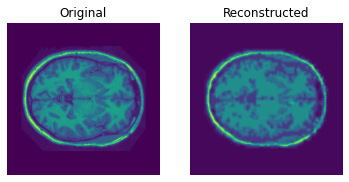

tf.Tensor(0.762213, shape=(), dtype=float32)


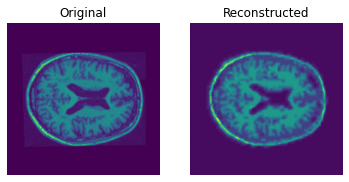

tf.Tensor(0.73945385, shape=(), dtype=float32)


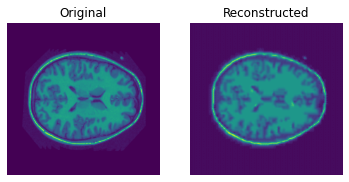

tf.Tensor(0.76586574, shape=(), dtype=float32)


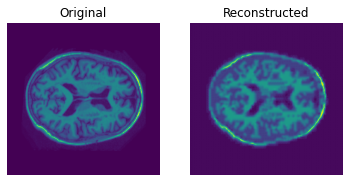

tf.Tensor(0.76403654, shape=(), dtype=float32)


In [25]:
def show_subplot(original, reconstructed):
    plt.subplot(1, 2, 1)
    plt.imshow(original.squeeze())
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed.squeeze())
    plt.title("Reconstructed")
    plt.axis("off")

    plt.show()


trained_vqvae_model = model.vqvae
idx = np.random.choice(len(test), 15)
print(idx)
test_images = test[idx]
reconstructions_test = trained_vqvae_model.predict(test_images)

for test_image, reconstructed_image in zip(test_images, reconstructions_test):
    show_subplot(test_image, reconstructed_image)
    sim = calculate_ssim(test_image, reconstructed_image)
    print(sim)

1/1 [==============================] - 0s 65ms/step


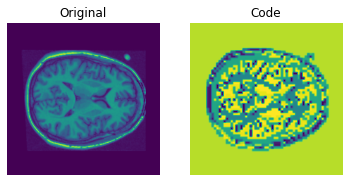

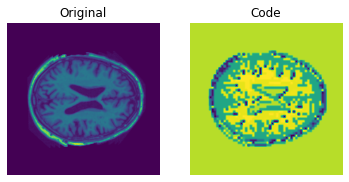

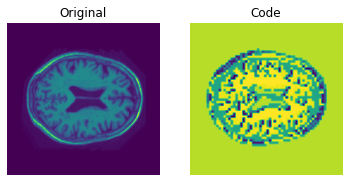

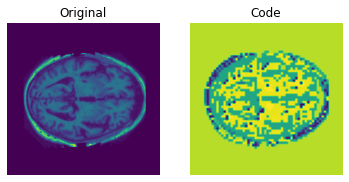

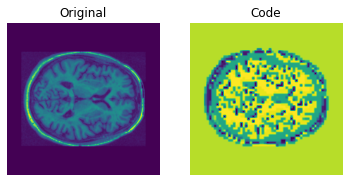

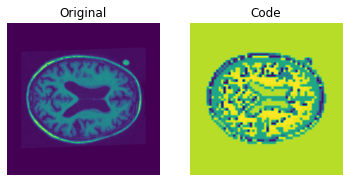

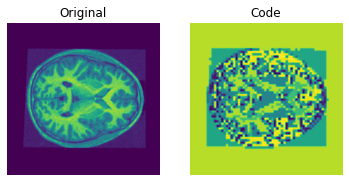

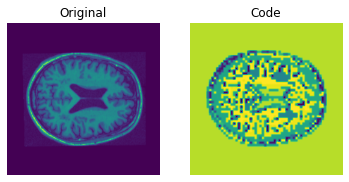

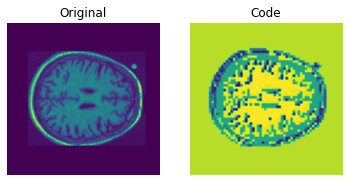

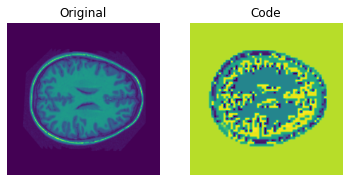

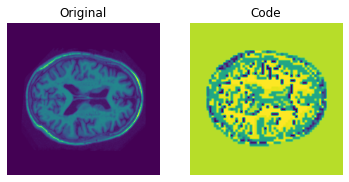

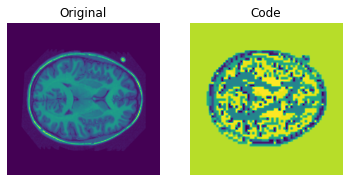

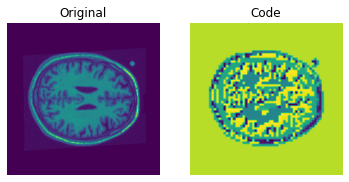

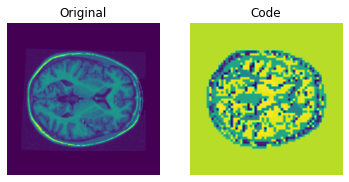

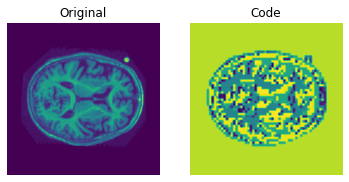

In [26]:
encoder = model.vqvae.get_layer("encoder")
quantizer = model.vqvae.get_layer("vector_quantizer")

encoded_outputs = encoder.predict(test_images)
flat_enc_outputs = encoded_outputs.reshape(-1, encoded_outputs.shape[-1])
codebook_indices = quantizer.get_code_indices(flat_enc_outputs)
codebook_indices = codebook_indices.numpy().reshape(encoded_outputs.shape[:-1])

for i in range(len(test_images)):
    plt.subplot(1, 2, 1)
    plt.imshow(test_images[i].squeeze() + 0.5)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(codebook_indices[i])
    plt.title("Code")
    plt.axis("off")
    plt.show()

In [27]:
num_residual_blocks = 2
num_pixelcnn_layers = 2
pixelcnn_input_shape = encoded_outputs.shape[1:-1]
print(f"Input shape of the PixelCNN: {pixelcnn_input_shape}")

Input shape of the PixelCNN: (64, 64)


In [28]:
# The first layer is the PixelCNN layer. This layer simply
# builds on the 2D convolutional layer, but includes masking.
class PixelConvLayer(layers.Layer):
    def __init__(self, mask_type, **kwargs):
        super(PixelConvLayer, self).__init__()
        self.mask_type = mask_type
        self.conv = layers.Conv2D(**kwargs)

    def build(self, input_shape):
        # Build the conv2d layer to initialize kernel variables
        self.conv.build(input_shape)
        # Use the initialized kernel to create the mask
        kernel_shape = self.conv.kernel.get_shape()
        self.mask = np.zeros(shape=kernel_shape)
        self.mask[: kernel_shape[0] // 2, ...] = 1.0
        self.mask[kernel_shape[0] // 2, : kernel_shape[1] // 2, ...] = 1.0
        if self.mask_type == "B":
            self.mask[kernel_shape[0] // 2, kernel_shape[1] // 2, ...] = 1.0

    def call(self, inputs):
        self.conv.kernel.assign(self.conv.kernel * self.mask)
        return self.conv(inputs)


# Next, we build our residual block layer.
# This is just a normal residual block, but based on the PixelConvLayer.
class ResidualBlock(keras.layers.Layer):
    def __init__(self, filters, **kwargs):
        super(ResidualBlock, self).__init__(**kwargs)
        self.conv1 = keras.layers.Conv2D(
            filters=filters, kernel_size=1, activation="relu"
        )
        self.pixel_conv = PixelConvLayer(
            mask_type="B",
            filters=filters // 2,
            kernel_size=3,
            activation="relu",
            padding="same",
        )
        self.conv2 = keras.layers.Conv2D(
            filters=filters, kernel_size=1, activation="relu"
        )

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pixel_conv(x)
        x = self.conv2(x)
        return keras.layers.add([inputs, x])


pixelcnn_inputs = keras.Input(shape=pixelcnn_input_shape, dtype=tf.int32)
ohe = tf.one_hot(pixelcnn_inputs, model.num_embeddings)
x = PixelConvLayer(
    mask_type="A", filters=128, kernel_size=7, activation="relu", padding="same"
)(ohe)

for _ in range(num_residual_blocks):
    x = ResidualBlock(filters=128)(x)

for _ in range(num_pixelcnn_layers):
    x = PixelConvLayer(
        mask_type="B",
        filters=128,
        kernel_size=1,
        strides=1,
        activation="relu",
        padding="valid",
    )(x)

out = keras.layers.Conv2D(
    filters=model.num_embeddings, kernel_size=1, strides=1, padding="valid"
)(x)

pixel_cnn = keras.Model(pixelcnn_inputs, out, name="pixel_cnn")
pixel_cnn.summary()

Model: "pixel_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 64, 64)]          0         
                                                                 
 tf.one_hot (TFOpLambda)     (None, 64, 64, 128)       0         
                                                                 
 pixel_conv_layer (PixelConv  (None, 64, 64, 128)      802944    
 Layer)                                                          
                                                                 
 residual_block (ResidualBlo  (None, 64, 64, 128)      98624     
 ck)                                                             
                                                                 
 residual_block_1 (ResidualB  (None, 64, 64, 128)      98624     
 lock)                                                           
                                                         

In [29]:
print(Oasis.shape, Oasis.min(), Oasis.max())
print(train.shape, train.min(), train.max())
print(validate.shape, validate.min(), validate.max())

(10784, 256, 256, 1) 0.0 1.0
(9664, 256, 256) 0.0 1.0
(1120, 256, 256, 1) 0.0 1.0


In [30]:
# Generate the codebook indices.
encoded_outputs = encoder.predict(validate)
flat_enc_outputs = encoded_outputs.reshape(-1, encoded_outputs.shape[-1])
codebook_indices = quantizer.get_code_indices(flat_enc_outputs)

codebook_indices = codebook_indices.numpy().reshape(encoded_outputs.shape[:-1])
print(f"Shape of the training data for PixelCNN: {codebook_indices.shape}")

35/35 [==============================] - 0s 4ms/step
Shape of the training data for PixelCNN: (1120, 64, 64)


In [31]:
pixel_cnn.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
pixel_cnn.fit(
    x=codebook_indices,
    y=codebook_indices,
    batch_size=128,
    epochs=30,
    validation_split=0.1,
)

Epoch 1/30
8/8 [==============================] - 4s 241ms/step - loss: 4.8062 - accuracy: 0.2109 - val_loss: 4.7133 - val_accuracy: 0.6180
Epoch 2/30
8/8 [==============================] - 1s 79ms/step - loss: 4.5727 - accuracy: 0.6412 - val_loss: 4.2807 - val_accuracy: 0.6313
Epoch 3/30
8/8 [==============================] - 1s 79ms/step - loss: 3.7283 - accuracy: 0.6031 - val_loss: 2.6491 - val_accuracy: 0.5939
Epoch 4/30
8/8 [==============================] - 1s 79ms/step - loss: 2.1147 - accuracy: 0.5963 - val_loss: 1.6292 - val_accuracy: 0.5939
Epoch 5/30
8/8 [==============================] - 1s 79ms/step - loss: 1.4875 - accuracy: 0.6293 - val_loss: 1.3332 - val_accuracy: 0.6402
Epoch 6/30
8/8 [==============================] - 1s 79ms/step - loss: 1.2832 - accuracy: 0.6690 - val_loss: 1.2332 - val_accuracy: 0.6612
Epoch 7/30
8/8 [==============================] - 1s 79ms/step - loss: 1.1738 - accuracy: 0.6805 - val_loss: 1.1229 - val_accuracy: 0.7055
Epoch 8/30
8/8 [==========

In [32]:
import tensorflow_probability as tfp

In [33]:
# Create a mini sampler model.
inputs = layers.Input(shape=pixel_cnn.input_shape[1:])
outputs = pixel_cnn(inputs, training=False)
categorical_layer = tfp.layers.DistributionLambda(tfp.distributions.Categorical)
outputs = categorical_layer(outputs)
sampler = keras.Model(inputs, outputs)

In [34]:
# Create an empty array of priors.
batch = 10
priors = np.zeros(shape=(batch,) + (pixel_cnn.input_shape)[1:])
batch, rows, cols = priors.shape

# Iterate over the priors because generation has to be done sequentially pixel by pixel.
for row in range(rows):
    for col in range(cols):
        # Feed the whole array and retrieving the pixel value probabilities for the next
        # pixel.
        probs = sampler.predict(priors)
        # Use the probabilities to pick pixel values and append the values to the priors.
        priors[:, row, col] = probs[:, row, col]

print(f"Prior shape: {priors.shape}")

1/1 [==============================] - 0s 18ms/step
Prior shape: (10, 64, 64)


1/1 [==============================] - 0s 121ms/step


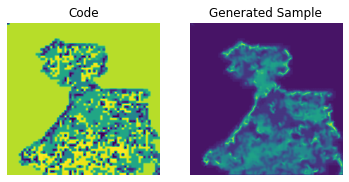

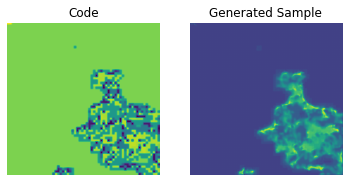

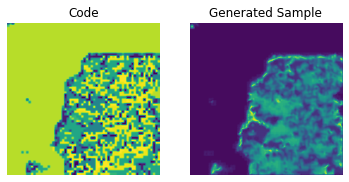

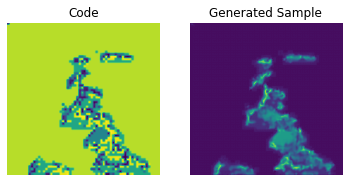

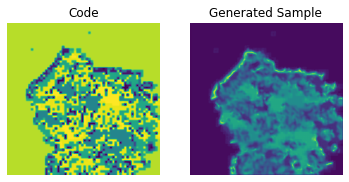

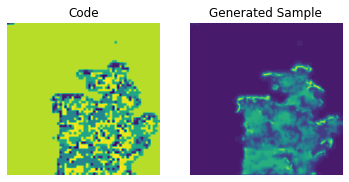

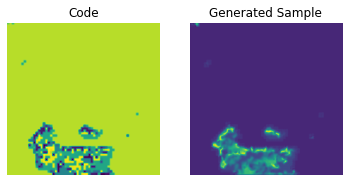

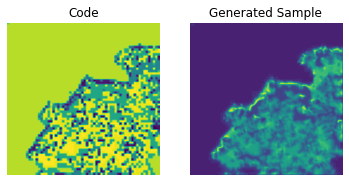

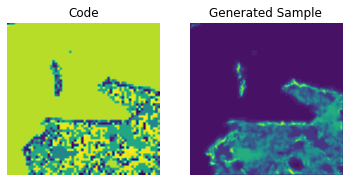

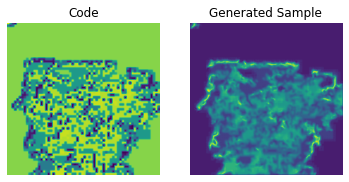

In [35]:
# Perform an embedding lookup.
pretrained_embeddings = quantizer.embeddings
priors_ohe = tf.one_hot(priors.astype("int32"), model.num_embeddings).numpy()
quantized = tf.matmul(
    priors_ohe.astype("float32"), pretrained_embeddings, transpose_b=True
)
quantized = tf.reshape(quantized, (-1, *(encoded_outputs.shape[1:])))

# Generate novel images.
decoder = model.vqvae.get_layer("decoder")
generated_samples = decoder.predict(quantized)

for i in range(batch):
    plt.subplot(1, 2, 1)
    plt.imshow(priors[i])
    plt.title("Code")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(generated_samples[i].squeeze() + 0.5)
    plt.title("Generated Sample")
    plt.axis("off")
    plt.show()